# **EN3160 Image Processing & Machine Vision**
#**Assignment 03**




---


*   Name : M.P.D.N. Wickramasingha
*   Index No : 210705E
*   Github Repository : https://github.com/shan-wrench/IPMV-Assignment03








## **Question 01**


---



100%|██████████| 170M/170M [00:14<00:00, 11.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Loss: 2.1565131882429123
Epoch 2/10, Loss: 1.9025120972394942
Epoch 3/10, Loss: 1.8055820219516754
Epoch 4/10, Loss: 1.749257290005684
Epoch 5/10, Loss: 1.7114653347730637
Epoch 6/10, Loss: 1.6826018921136856
Epoch 7/10, Loss: 1.659858121752739
Epoch 8/10, Loss: 1.6411541565656662
Epoch 9/10, Loss: 1.6241755071878434
Epoch 10/10, Loss: 1.61071052134037


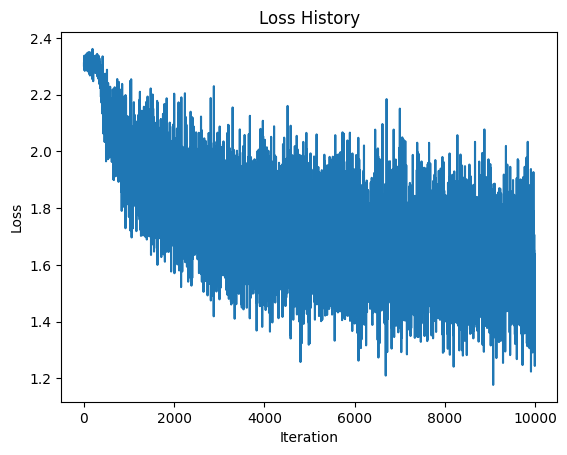

Training accuracy: 44.57%
Test accuracy: 43.34%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
Hidden = 100  # Hidden layer size
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, Hidden) * std  # Weights for input to hidden layer
b1 = torch.zeros(Hidden)  # Bias for hidden layer
w2 = torch.randn(Hidden, K) * std  # Weights for hidden to output layer
b2 = torch.zeros(K)  # Bias for output layer

# Hyperparameters
iterations = 10
lr = 1e-3  # Learning rate
lr_decay = 0.9  # Learning rate decay
loss_history = []

# 3. Training Loop
for epoch in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Convert labels to one-hot encoding
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_pred = hidden.mm(w2) + b2  # Output layer activation

        # Loss calculation (Cross-Entropy Loss)
        loss = nn.functional.cross_entropy(y_pred, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = torch.softmax(y_pred, dim=1) - y_train_onehot
        dw2 = hidden.t().mm(dy_pred)
        db2 = dy_pred.sum(dim=0)
        d_hidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)  # Sigmoid derivative
        dw1 = x_train.t().mm(d_hidden)
        db1 = d_hidden.sum(dim=0)

        # Parameter update
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

    # Print loss for every epoch
    print(f"Epoch {epoch + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Apply learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


## **Question 02**


---



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 4.98MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 57.7kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 238kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.71MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Avg Loss: 0.2409
Epoch [2/10], Avg Loss: 0.0698
Epoch [3/10], Avg Loss: 0.0496
Epoch [4/10], Avg Loss: 0.0402
Epoch [5/10], Avg Loss: 0.0327
Epoch [6/10], Avg Loss: 0.0263
Epoch [7/10], Avg Loss: 0.0246
Epoch [8/10], Avg Loss: 0.0195
Epoch [9/10], Avg Loss: 0.0177
Epoch [10/10], Avg Loss: 0.0172


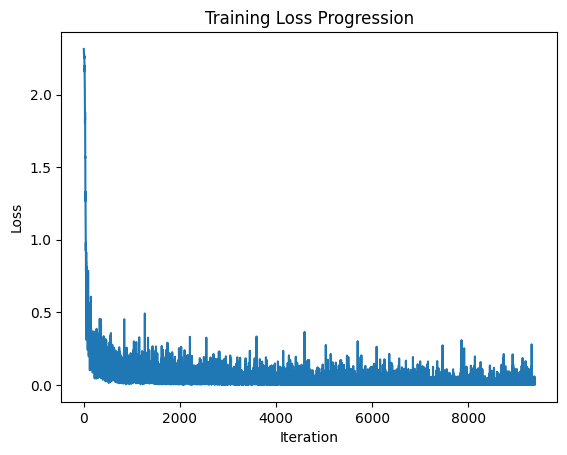

Final Training Accuracy: 99.71%
Final Test Accuracy: 99.12%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# LeNet-5 Model Definition
class LeNet5Model(nn.Module):
    def __init__(self):
        super(LeNet5Model, self).__init__()
        self.layer1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.layer2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.fc_layer1 = nn.Linear(16 * 5 * 5, 120)
        self.fc_layer2 = nn.Linear(120, 84)
        self.fc_output = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.layer2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = torch.relu(self.fc_layer1(x))
        x = torch.relu(self.fc_layer2(x))
        x = self.fc_output(x)
        return x

# Data preparation
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
batch_sz = 64

# Load training and testing datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=data_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_sz, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=data_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_sz, shuffle=False)

# Model, Loss, and Optimizer initialization
net = LeNet5Model()
loss_fn = nn.CrossEntropyLoss()
optim_fn = optim.Adam(net.parameters(), lr=0.001)

# Training
num_epochs = 10
loss_track = []

for epoch in range(num_epochs):
    total_loss = 0.0
    for batch_data, batch_labels in train_loader:
        optim_fn.zero_grad()
        predictions = net(batch_data)
        loss = loss_fn(predictions, batch_labels)
        loss.backward()
        optim_fn.step()

        total_loss += loss.item()
        loss_track.append(loss.item())

    avg_loss = total_loss / len(train_loader)
    print("Epoch [{}/{}], Avg Loss: {:.4f}".format(epoch + 1, num_epochs, avg_loss))

# Plot the Training Loss
plt.plot(loss_track)
plt.title("Training Loss Progression")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# Training Accuracy Calculation
train_correct = 0
train_total = 0
with torch.no_grad():
    for images, labels in train_loader:
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted_labels == labels).sum().item()

training_accuracy = 100 * train_correct / train_total
print("Final Training Accuracy: {:.2f}%".format(training_accuracy))

# Testing Accuracy Calculation
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted_labels == labels).sum().item()

testing_accuracy = 100 * test_correct / test_total
print("Final Test Accuracy: {:.2f}%".format(testing_accuracy))


## **Question 03**



---





In [4]:
import kagglehub
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import time
import copy
import os

# Transformations for data augmentation and normalization
transform_config = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Dataset loading from Kaggle
dataset_path = kagglehub.dataset_download("thedatasith/hymenoptera")

# Define directories for training and validation
base_dir = os.path.join(dataset_path, "hymenoptera")
datasets_dict = {x: datasets.ImageFolder(os.path.join(base_dir, x), transform_config[x]) for x in ['train', 'val']}
loaders = {x: torch.utils.data.DataLoader(datasets_dict[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}

# Initialize pre-trained ResNet18 model
neural_net = models.resnet18(pretrained=True)
feature_count = neural_net.fc.in_features

# Adjust final layer for binary classification (ants vs. bees)
neural_net.fc = nn.Linear(feature_count, 2)

# Set device to GPU if available, otherwise CPU
device_type = torch.device("cuda" if torch.cuda.is_available() else "cpu")
neural_net = neural_net.to(device_type)

# Loss function and optimizer configuration
loss_func = nn.CrossEntropyLoss()
optim_func = optim.SGD(neural_net.parameters(), lr=0.001, momentum=0.9)

# Function for training and validating the neural network
def execute_training(neural_net, loaders, loss_func, optim_func, epochs=25):
    start = time.time()
    optimal_weights = copy.deepcopy(neural_net.state_dict())
    highest_accuracy = 0.0

    for ep in range(epochs):
        print(f"--- Epoch [{ep+1}/{epochs}] ---")

        # Phases for training and validation
        for mode in ['train', 'val']:
            if mode == 'train':
                neural_net.train()  # Enable training mode
            else:
                neural_net.eval()  # Enable evaluation mode

            epoch_loss = 0.0
            correct_predictions = 0

            # Loop through data in the current phase
            for img_batch, label_batch in loaders[mode]:
                img_batch, label_batch = img_batch.to(device_type), label_batch.to(device_type)

                # Reset gradients
                optim_func.zero_grad()

                # Forward propagation
                with torch.set_grad_enabled(mode == 'train'):
                    predictions = neural_net(img_batch)
                    _, pred_classes = torch.max(predictions, 1)
                    loss = loss_func(predictions, label_batch)

                    # Backward propagation and optimization in training phase
                    if mode == 'train':
                        loss.backward()
                        optim_func.step()

                # Calculate batch statistics
                epoch_loss += loss.item() * img_batch.size(0)
                correct_predictions += torch.sum(pred_classes == label_batch.data)

            # Average loss and accuracy for this epoch
            avg_loss = epoch_loss / len(loaders[mode].dataset)
            accuracy = correct_predictions.double() / len(loaders[mode].dataset)

            print(f"{mode.capitalize()} | Loss: {avg_loss:.4f} | Accuracy: {accuracy:.4f}")

            # Save the best model weights based on validation accuracy
            if mode == 'val' and accuracy > highest_accuracy:
                highest_accuracy = accuracy
                optimal_weights = copy.deepcopy(neural_net.state_dict())

        print(" ")

    # Time tracking
    total_time = time.time() - start
    print(f"Training concluded in {total_time // 60:.0f} mins and {total_time % 60:.0f} secs")
    print(f"Highest validation accuracy attained: {highest_accuracy:.4f}")

    # Reload best model weights
    neural_net.load_state_dict(optimal_weights)
    return neural_net

# Execute the training function
num_epochs = 25
trained_model = execute_training(neural_net, loaders, loss_func, optim_func, epochs=num_epochs)


--- Epoch [1/25] ---
Train | Loss: 0.7439 | Accuracy: 0.5205
Val | Loss: 0.5721 | Accuracy: 0.6993
                    
--- Epoch [2/25] ---
Train | Loss: 0.5000 | Accuracy: 0.7828
Val | Loss: 0.3439 | Accuracy: 0.8693
                    
--- Epoch [3/25] ---
Train | Loss: 0.3089 | Accuracy: 0.8811
Val | Loss: 0.2454 | Accuracy: 0.9150
                    
--- Epoch [4/25] ---
Train | Loss: 0.2338 | Accuracy: 0.9221
Val | Loss: 0.2163 | Accuracy: 0.9346
                    
--- Epoch [5/25] ---
Train | Loss: 0.1968 | Accuracy: 0.9262
Val | Loss: 0.1960 | Accuracy: 0.9412
                    
--- Epoch [6/25] ---
Train | Loss: 0.1679 | Accuracy: 0.9385
Val | Loss: 0.1791 | Accuracy: 0.9412
                    
--- Epoch [7/25] ---
Train | Loss: 0.1851 | Accuracy: 0.9180
Val | Loss: 0.1731 | Accuracy: 0.9346
                    
--- Epoch [8/25] ---
Train | Loss: 0.1779 | Accuracy: 0.9221
Val | Loss: 0.1693 | Accuracy: 0.9346
                    
--- Epoch [9/25] ---
Train | Loss: 0.122

In [2]:
import kagglehub
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
import time
import copy
import os

# Setting up transformations for data augmentation and normalization
augmentation_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Download the dataset using Kaggle API
dataset_path = kagglehub.dataset_download("thedatasith/hymenoptera")

# Define paths for training and validation folders
image_directory = os.path.join(dataset_path, "hymenoptera")
dataset_folders = {phase: datasets.ImageFolder(os.path.join(image_directory, phase), augmentation_transforms[phase]) for phase in ['train', 'val']}
data_loaders = {phase: torch.utils.data.DataLoader(dataset_folders[phase], batch_size=32, shuffle=True, num_workers=4) for phase in ['train', 'val']}

# Initialize a ResNet18 model pre-trained on ImageNet
neural_net = models.resnet18(pretrained=True)
feature_count = neural_net.fc.in_features

# Freeze all model layers for feature extraction, except the last layer
for param in neural_net.parameters():
    param.requires_grad = False

# Update the final fully connected layer to output 2 classes (for ants and bees)
neural_net.fc = nn.Linear(feature_count, 2)

# Check if a GPU is available and move model to appropriate device
device_type = torch.device("cuda" if torch.cuda.is_available() else "cpu")
neural_net = neural_net.to(device_type)

# Set loss function and optimizer for the unfrozen layer
loss_function = nn.CrossEntropyLoss()
optimizer_strategy = optim.SGD(neural_net.fc.parameters(), lr=0.001, momentum=0.9)

# Define a function to handle training and validation
def execute_training(neural_net, data_loaders, loss_function, optimizer_strategy, num_epochs=25):
    begin_time = time.time()
    optimal_model_weights = copy.deepcopy(neural_net.state_dict())
    highest_accuracy = 0.0

    for cycle in range(num_epochs):
        print(f"--- Epoch [{cycle+1}/{num_epochs}] ---")

        # Process each phase separately for training and validation
        for stage in ['train', 'val']:
            if stage == 'train':
                neural_net.train()  # Enable training mode
            else:
                neural_net.eval()  # Enable evaluation mode

            accumulated_loss = 0.0
            correct_predictions = 0

            # Process the data in batches
            for batch_inputs, batch_labels in data_loaders[stage]:
                batch_inputs, batch_labels = batch_inputs.to(device_type), batch_labels.to(device_type)

                # Reset the gradients
                optimizer_strategy.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(stage == 'train'):
                    predictions = neural_net(batch_inputs)
                    _, forecasted_labels = torch.max(predictions, 1)
                    error = loss_function(predictions, batch_labels)

                    # Backpropagation and optimization only in training phase
                    if stage == 'train':
                        error.backward()
                        optimizer_strategy.step()

                # Collect statistics
                accumulated_loss += error.item() * batch_inputs.size(0)
                correct_predictions += torch.sum(forecasted_labels == batch_labels.data)

            # Calculate average loss and accuracy for the epoch
            avg_loss = accumulated_loss / len(data_loaders[stage].dataset)
            avg_accuracy = correct_predictions.double() / len(data_loaders[stage].dataset)
            print(f"{stage.capitalize()} | Loss: {avg_loss:.4f} | Accuracy: {avg_accuracy:.4f}")


            # Save the model if it has achieved better accuracy on validation
            if stage == 'val' and avg_accuracy > highest_accuracy:
                highest_accuracy = avg_accuracy
                optimal_model_weights = copy.deepcopy(neural_net.state_dict())

        print(" ")

    elapsed_time = time.time() - begin_time
    print(f"Training concluded in {elapsed_time // 60:.0f} mins {elapsed_time % 60:.0f} secs")
    print(f"Top Validation Accuracy: {highest_accuracy:.4f}")

    # Load the weights with the highest validation accuracy
    neural_net.load_state_dict(optimal_model_weights)
    return neural_net

# Begin model training and validation
epoch_count = 25
neural_net = execute_training(neural_net, data_loaders, loss_function, optimizer_strategy, num_epochs=epoch_count)


--- Epoch [1/25] ---
Train | Loss: 0.7391 | Accuracy: 0.5041
Val | Loss: 0.6657 | Accuracy: 0.6013
 
--- Epoch [2/25] ---
Train | Loss: 0.5983 | Accuracy: 0.6680
Val | Loss: 0.4628 | Accuracy: 0.7908
 
--- Epoch [3/25] ---
Train | Loss: 0.4227 | Accuracy: 0.8402
Val | Loss: 0.3641 | Accuracy: 0.8562
 
--- Epoch [4/25] ---
Train | Loss: 0.3416 | Accuracy: 0.8730
Val | Loss: 0.2917 | Accuracy: 0.9020
 
--- Epoch [5/25] ---
Train | Loss: 0.3372 | Accuracy: 0.8689
Val | Loss: 0.2566 | Accuracy: 0.9085
 
--- Epoch [6/25] ---
Train | Loss: 0.3442 | Accuracy: 0.8525
Val | Loss: 0.2519 | Accuracy: 0.9150
 
--- Epoch [7/25] ---
Train | Loss: 0.2494 | Accuracy: 0.9139
Val | Loss: 0.2394 | Accuracy: 0.9216
 
--- Epoch [8/25] ---
Train | Loss: 0.2349 | Accuracy: 0.9057
Val | Loss: 0.2204 | Accuracy: 0.9281
 
--- Epoch [9/25] ---
Train | Loss: 0.2438 | Accuracy: 0.8975
Val | Loss: 0.2036 | Accuracy: 0.9216
 
--- Epoch [10/25] ---
Train | Loss: 0.2380 | Accuracy: 0.9344
Val | Loss: 0.2008 | Accuracy